In [3]:
import numpy as np
from astropy.table import Table
import os
import matplotlib.pyplot as plt
import pandas as pd
import mesaPlot as mp
m=mp.MESA()
p=mp.plot()

# For the enhanced mixing case

In [8]:
m.log_fold='/mnt/home/lvanson/ceph/MESAoutput/ksharpe_proj/RunEnhancedMixToEnd/LOGS/'
m.loadHistory()

In [30]:
# print(m.hist.data.dtype.names)
substring = 'center'
matching_fields = [name for name in m.hist.data.dtype.names if substring in name]
print(matching_fields)

['log_center_T', 'log_center_Rho', 'log_center_P', 'center_mu', 'center_ye', 'center_abar', 'center_neut', 'center_h1', 'center_prot', 'center_he3', 'center_he4', 'center_c12', 'center_n14', 'center_o16', 'center_ne20', 'center_mg24', 'center_si28', 'center_s32', 'center_ar36', 'center_ca40', 'center_ti44', 'center_cr48', 'center_cr56', 'center_fe52', 'center_fe54', 'center_fe56', 'center_ni56']


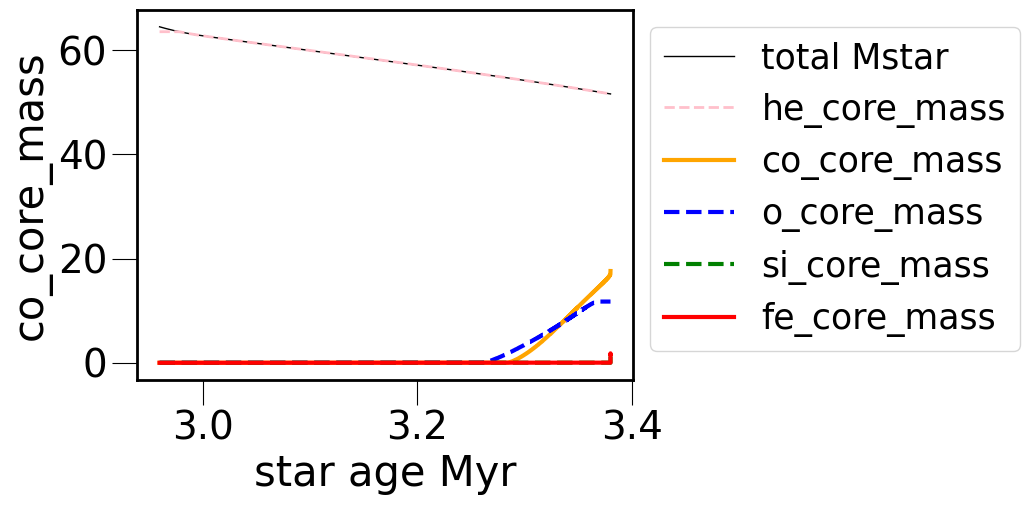

In [9]:

def plot_core_evol(data):
    fig, ax = plt.subplots()

    plt.plot(data['star_age']/1e6,data['star_mass'], color='k', lw = 1, label = 'total Mstar')
    plt.plot(data['star_age']/1e6,data['he_core_mass'], c = 'pink', lw = 2, ls = '--', label = 'he_core_mass')
    plt.plot(data['star_age']/1e6,data['co_core_mass'], c = 'orange',lw = 3, label = 'co_core_mass')
    # plt.plot(data['star_age']/1e6,data['c_core_mass'], c = 'yellow',lw = 3, label = 'c_core_mass')
    plt.plot(data['star_age']/1e6,data['o_core_mass'], c = 'blue', lw = 3, ls = '--',label = 'o_core_mass')
    plt.plot(data['star_age']/1e6,data['si_core_mass'], c = 'green', lw = 3, ls = '--',label = 'si_core_mass')
    plt.plot(data['star_age']/1e6,data['fe_core_mass'], c = 'red', lw = 3, label = 'fe_core_mass')

    plt.xlabel('star age Myr')
    plt.ylabel('co_core_mass')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.show()

plot_core_evol(m.hist.data)

In [47]:
# load the pre-evolution model  
m_pre_evol=mp.MESA()
m_pre_evol.log_fold='/mnt/home/lvanson/ceph/ksharpe/BOOSTEDES_GRID_OUTPUT/mesa_models/380/LOGS1/'
m_pre_evol.loadHistory()

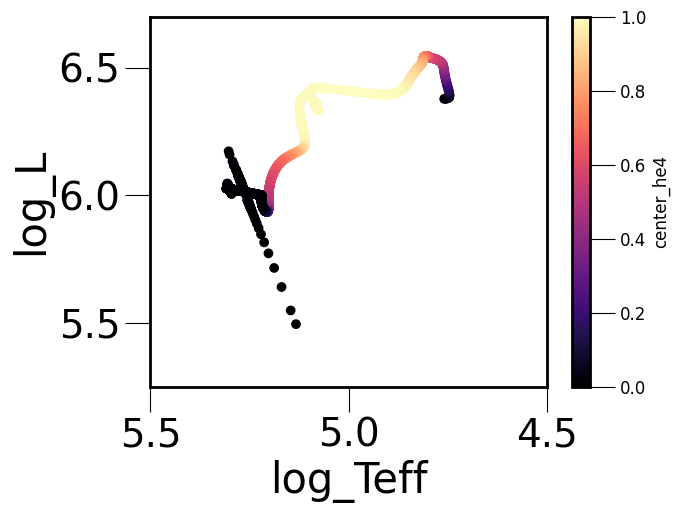

In [42]:
# center_he4 center_c12 'center_n14', 'center_o16', 'center_ne20', 'center_mg24 center_fe52

fig, ax = plt.subplots()

#########################
## Pre-evolution
color_by = 'center_he4'

plt.scatter(m_pre_evol.hist.data['log_Teff'],m_pre_evol.hist.data['log_L'],
 c=m_pre_evol.hist.data[color_by], cmap= 'magma', lw = 1, label = 'pre-evol')

# # colorbar
# cbar = plt.colorbar()
# cbar.set_label(color_by, size=12)
# cbar.ax.tick_params(labelsize=12)

#########################
## Future evolution
color_by2 = 'center_he4'

plt.scatter(m.hist.data['log_Teff'],m.hist.data['log_L'],
 c=m.hist.data[color_by2], cmap= 'magma', lw = 1, label = 'post-evol', vmin = 0, vmax = 1)

# colorbar
cbar = plt.colorbar()
cbar.set_label(color_by2, size=12)
cbar.ax.tick_params(labelsize=12)

plt.xlim(5.5,4.5)
plt.ylim(5.25,6.7)
plt.xlabel('log_Teff')
plt.ylabel('log_L')
plt.show()
# p.plotHR(m)

# For the reduced mixing case

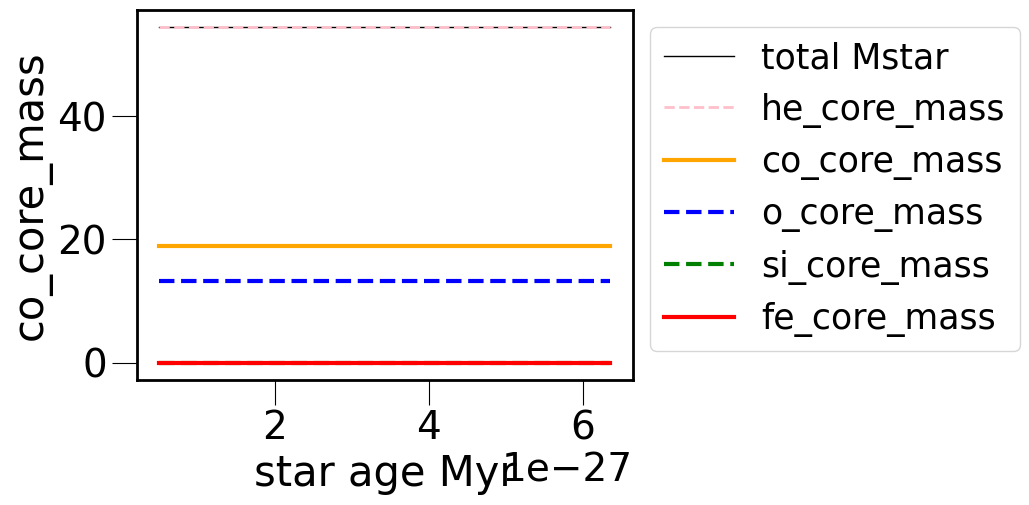

In [46]:
m.log_fold='/mnt/home/lvanson/ceph/MESAoutput/ksharpe_proj/ReducedMixToEnd/LOGS/'
m.loadHistory()
plot_core_evol(m.hist.data)

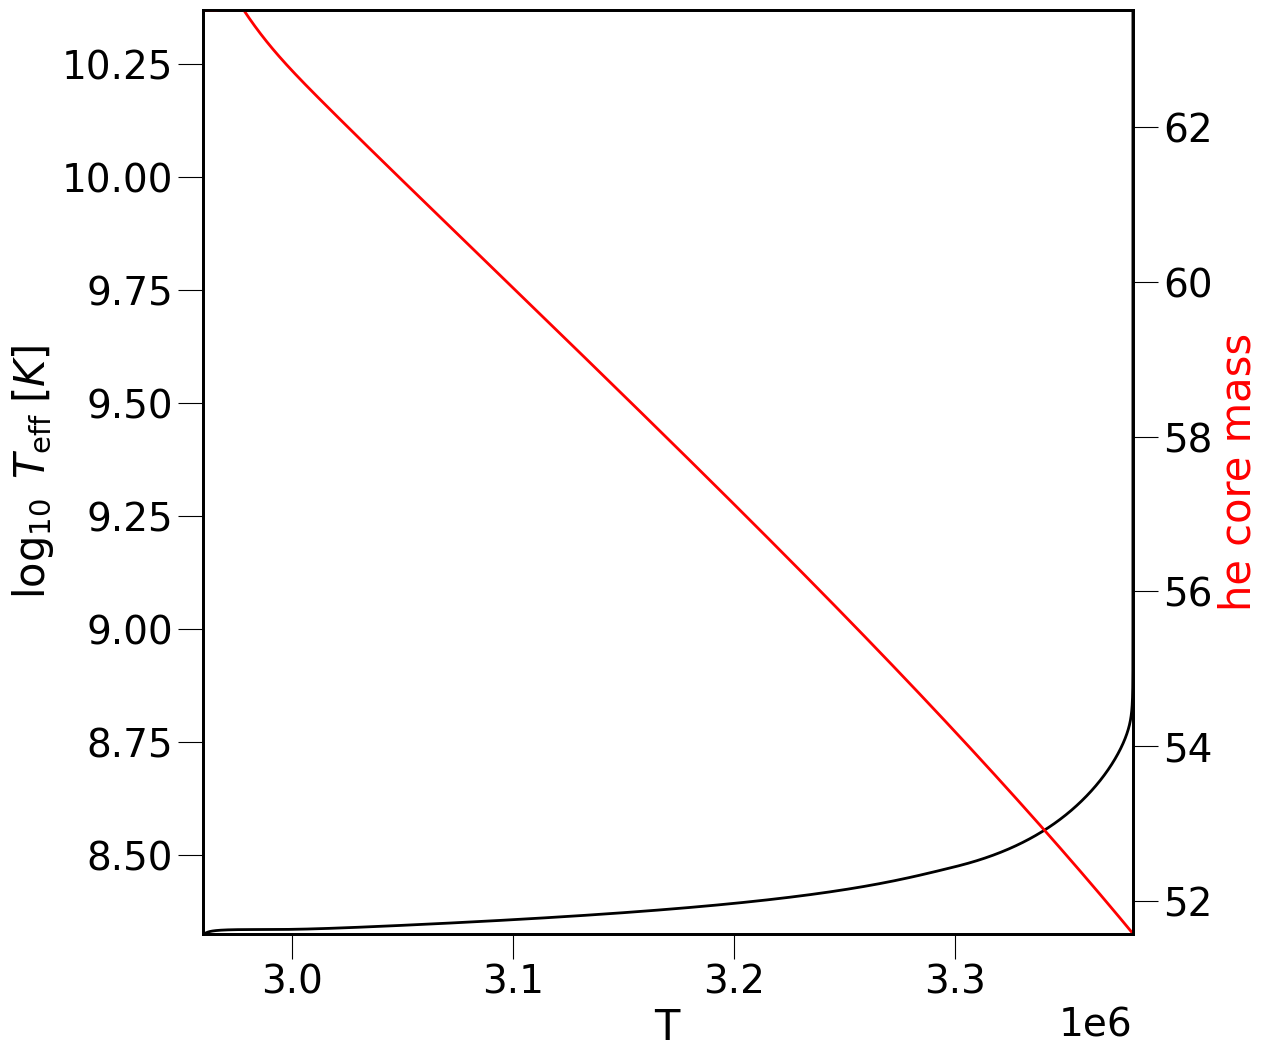

In [3]:
p.plotHistory(m,xaxis='star_age',y1='log_center_T',y2='he_core_mass')

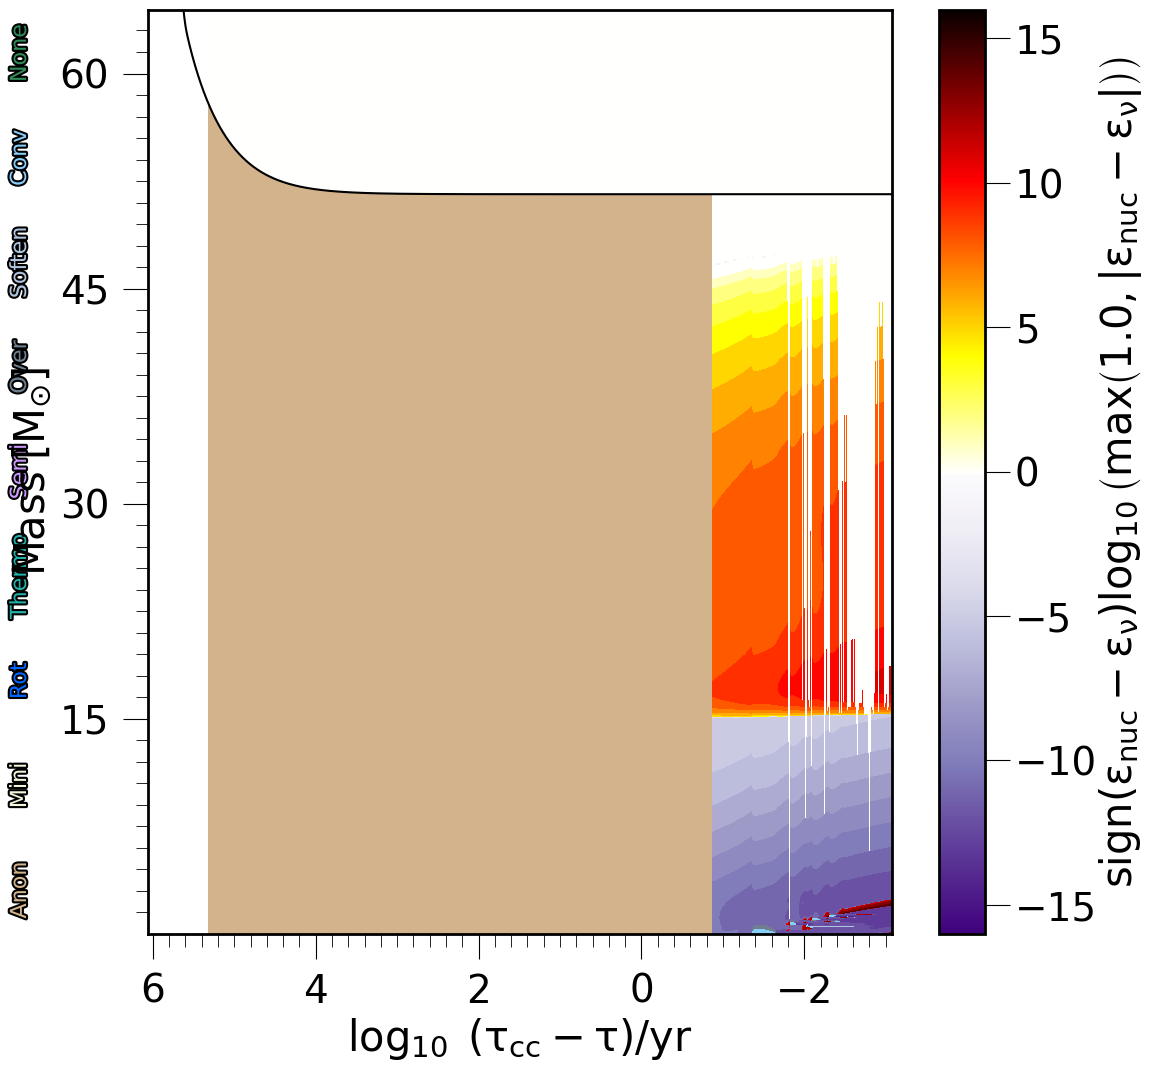

In [19]:
# p.plotKip3(m)
p.plotKip3(m,xaxis='star_age',age_log=True,age_lookback=True, mod_min=1,mod_max=24473)


/mnt/home/lvanson/ceph/MESAoutput/ksharpe_proj/RunEnhancedMixToEnd/LOGS//profile1.data
/mnt/home/lvanson/ceph/MESAoutput/ksharpe_proj/RunEnhancedMixToEnd/LOGS//profile1.data


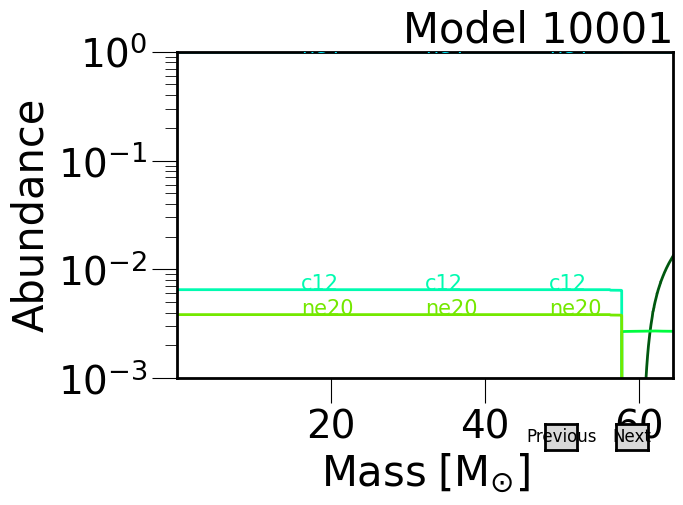

In [22]:
# %matplotlib widget
m.loadProfile(num=30)
p.plotSliderProf(m,'plotAbun')